In [4]:
import numpy as np                       # mathematical methods
from scipy import stats                  # statistical methods
from matplotlib import pyplot as plt     # plotting methods
%matplotlib inline

# Wahrscheinlichkeitstheorie

### Zufallsvariable und Wahrscheinlichkeitsraum
### Diskrete Zufallsvariablen und Wahrscheinlichkeitsverteilungen
### <span style="color:blue">Kontinuierliche Zufallsvariable und Wahrscheinlichkeitsverteilungen</span>
#### Kontinuierliche Verteilungen
#### Mehrdimensionale Verteilungen
#### <span style="color:blue">Zusammengesetzte kontinuierliche Verteilungen</span>
- Summe zweier Zufallsvariablen
- Quadrat einer Zufallsvariablen
- Identisch unabhängig verteilte Zufallsvariable
- Summe vieler i.i.d. Zufallsvariable
- Mittelwert vieler i.i.d. Zufallsvariable

### (Wiederholung) Kennzahlen 
einer kontinuierlichen Zufallsvariable $X$ mit Wahrscheinlichkeitsdichte $f(X)$

$$\mathcal{E}(X) = \int_{-\infty}^{\infty} f(x)\cdot x\;\mathrm{d}x = \mu$$
$$\mathrm{Var}(X) = \int_{-\infty}^{\infty} f(x)\cdot (x-\mu)^2\;\mathrm{d}x$$

# Summe von zwei Zufallsvariablen 
<br>
$$Y=X_1+X_2$$

Für zwei Zufallsvariable $X_1$ und $X_2$ ist $Y=X_1+X_2$ wieder eine Zufallsvariable

### (Wiederholung) Erwartungswert
Allgemein gilt für den Erwartungswert einer Summe von Zufallsvariablen $X_i$

$$\mathcal{E}\left(\sum_{i=1}^N X_i\right)  = \sum_{i=1}^N \mathcal{E}(X_i)$$

Sind diese Zufallsvariablen *unabhängig*, dann gilt

$$\mathrm{Var} \left(\sum_{i=1}^N X_i \right)  = \sum_{i=1}^N \mathrm{Var}(X_i)$$

### (Wiederholung) Normalverteilung
Sind $X_1\sim \mathcal{N}(\mu_1, \sigma_1^2)$ und $X_2\sim \mathcal{N}(\mu_2, \sigma_2^2)$ voneinander *unabhängig*, dann ist $Y=X_1+X_2$ 

$$Y\sim \mathcal{N}(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2)$$ 

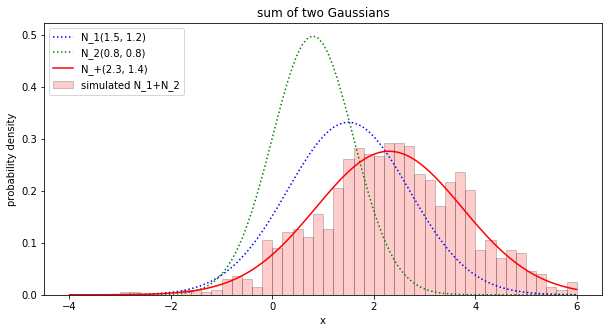

In [5]:
'''example: sum of two normal distributed random variables'''
N = 1000                                        # number of samples to draw from X1 and X2
a = -4.                                         # plotting borders
b = 6.
mu1 = 1.5                                       # shape parameter distribution X1
sigma1 = 1.2
mu2 = .8                                        # shape parameter distribution X2
sigma2 = 0.8
x = np.linspace(a, b, int((b-a)*10+1))          # x grid for plotting
x1 = stats.norm(mu1, sigma1).rvs(size=N)        # outcomes random variable X1
x2 = stats.norm(mu2, sigma2).rvs(size=N)        # outcomes random Variable X2
y = x1 + x2                                     # outcomes random variable sum Y = X1+X2   
f = plt.figure(figsize=(10,5))
plt.hist(y, bins=np.linspace(a, b, 50+1), color='r', edgecolor='black',
         density=True, alpha=.2, label='simulated N_1+N_2')
plt.plot(x, stats.norm(mu1, sigma1).pdf(x), 'b:', label='N_1({:.1f}, {:.1f})'.format(mu1, sigma1))
plt.plot(x, stats.norm(mu2, sigma2).pdf(x), 'g:', label='N_2({:.1f}, {:.1f})'.format(mu2, sigma2))
mu3 = mu1 + mu2
sigma3 = np.sqrt(sigma1**2 + sigma2**2)
plt.plot(x, stats.norm(mu3, sigma3).pdf(x), 'r-', label='N_+({:.1f}, {:.1f})'.format(mu3, sigma3))
plt.title('sum of two Gaussians')
plt.xlabel('x')
plt.ylabel('probability density')
plt.legend(loc='upper left');

----

## Produkt von zwei Zufallsvariablen


$$Y = X_1\cdot X_2$$

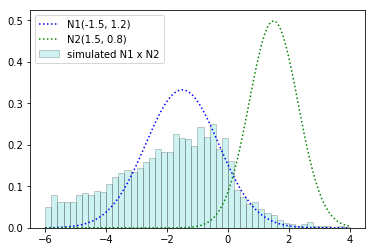

In [6]:
'''product of two random variables; example two Gaussians'''
N = 4000
a = -6.
b = 4.
mu1, mu2, sigma1, sigma2 = (-1.5, 1.5, 1.2, 0.8)
x = np.linspace(a, b, int((b-a)*10+1))
x1 = stats.norm(mu1, sigma1).rvs(size=N)
x2 = stats.norm(mu2, sigma2).rvs(size=N)
y = x1 * x2
plt.hist(y, bins=np.linspace(a, b, 50+1), color='c', edgecolor='black',
         density=True, alpha=.2, label='simulated N1 x N2')
plt.plot(x, stats.norm(mu1, sigma1).pdf(x), 'b:', label='N1({:.1f}, {:.1f})'.format(mu1, sigma1))
plt.plot(x, stats.norm(mu2, sigma2).pdf(x), 'g:', label='N2({:.1f}, {:.1f})'.format(mu2, sigma2))
plt.legend(loc='upper left');

----

# Quadrat einer (normalverteilten) Zufallsvariable 
<br>
$$Y=X^2$$

ist wieder eine Zufallsvariable
- Unterschied zum Produkt $X_1\cdot X_2$?

- abhängig!

- daher andere Eigenschaften

#### Beispiel
- $Z \sim \mathcal{N}(0,1)$
- $Y = Z^2$

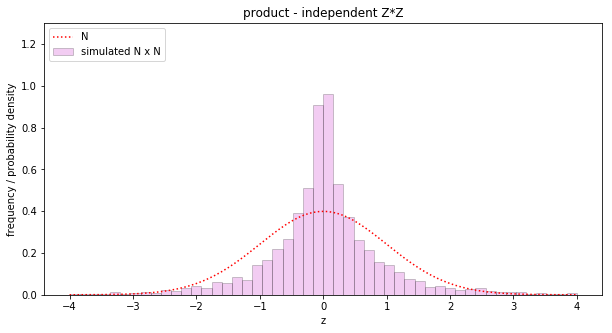

In [7]:
'''independent Z*Z: product of i.i.d. Standard Normal distribution'''
N = 4000
a = -4.                                      # range of z
b = 4.
zgrid = np.linspace(a, b, int((b-a)*20+1))   #    and z grid for plotting
distrib = stats.norm(0, 1)                   # standard Normal distribution
z1 = distrib.rvs(size=N)                     # outcomes of rv Z_1         
z2 = distrib.rvs(size=N)                     # outcomes of rv Z_2, indep.!
y_p = z1 * z2                                # outcomes of rv y_product
f = plt.figure(figsize=(10,5))
plt.hist(y_p, bins=np.linspace(a, b, 50+1), color='m', edgecolor='black', 
         density=True, alpha=.2, label='simulated N x N')
plt.plot(zgrid, distrib.pdf(zgrid), 'r:', label='N') # compare with single Z
plt.ylim(0, 1.3)
plt.xlabel('z')
plt.ylabel('frequency / probability density')
plt.title('product - independent Z*Z')
plt.legend(loc='upper left');

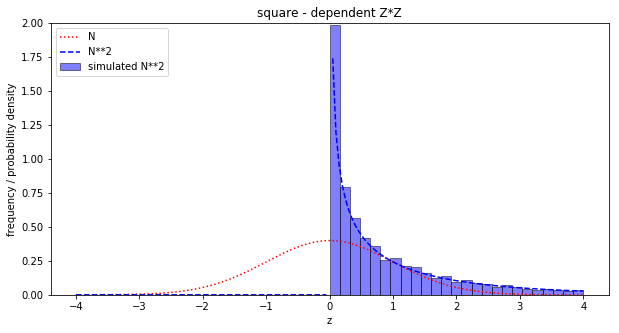

In [8]:
'''dependent X*X: squared normal distribution'''
# x1 = distrib.rvs(size=N)                              # same parameters as above
y_sq = z1**2                                            # outcomes of rv y_squared
f = plt.figure(figsize=(10,5))
plt.hist(y_sq, bins=np.linspace(a, b, 50+1), color='b', edgecolor='black', 
         density=True, alpha=.5, label='simulated N**2')
plt.plot(zgrid, distrib.pdf(zgrid), 'r:', label='N')    # compare with single Z
plt.ylim(0, 2)
plt.plot(zgrid, stats.chi2(df=1).pdf(zgrid), 'b--', label='N**2')
plt.xlabel('z')
plt.ylabel('frequency / probability density')
plt.title('square - dependent Z*Z')
plt.legend(loc='upper left');

Ganze Familie von Verteilungen; siehe

### $\chi^2$ -Verteilung

Dort dann auch Eigenschaften.

----

# Summe mehrerer *i.i.d.* Zufallsvariable
Sei $X$ eine Zufallsvariabe mit
- Wahrscheinlichkeitsdichte $f(X)$, Verteilungsfunktion $F(X)$
- Erwartungswert $\mu$
- und Varianz $\sigma^2$.

$X_i$ sei eine von $n$ unabhängigen identischen Wiederholungen ("*i.i.d.*")

## Summen-Zufallsvariable
Die Summe $S_n$ ist eine Zufallsvariable 
<div class="alert alert-block alert-success">
$$S_n = \sum_{i=1}^n X_i$$
</div>

### Erwartungswert
Wie zuvor ($N=2$) gilt für mehrere ($n$) Zufallsvariablen $X_i$ 
<div class="alert alert-block alert-success">
$$\mathcal{E}(S_n) = \mathcal{E}(\sum_{i=1}^n X_i) = \sum_{i=1}^n \mathcal{E}(X_i) =  \sum_{i=1}^n \mu = n\cdot \mu$$
</div>

### Varianz
<div class="alert alert-block alert-success">
$$\mathrm{Var}(S_n) = \mathrm{Var}(\sum_{i=1}^n X_i)  = \sum_{i=1}^n \mathrm{Var}(X_i) = \sum_{i=1}^n \sigma^2 = n \cdot \sigma^2$$
</div>

Beweis: wegen *i.i.d.* und $\mathrm{Var}(X+Y) = \mathrm{Var}(X) + \mathrm{Var}(Y) + 2\mathrm{Cov}(X,Y)$

## Mittelwert mehrerer *i.i.d.* Zufallsvariablen
Selbe Voraussetzungen wie unter "*Summe mehrerer i.i.d. Zufallsvariable*".

Zufallsvariable *Arithmetisches Mittel*:
$$\overline{X_n} = \frac{1}{n}S_n = \frac{1}{n}\sum_{i=1}^n X_i$$

Das Ergebnis des Zufallsexperiments $\overline X_n$ : $\overline{x}_n$ besteht aus den Ergebnissen $x_i$:
$$\overline{x_n} =  \frac{1}{n}\sum_{i=1}^n x_i$$

Zufallsvariable *Arithmetisches Mittel*:
$$\overline{X_n} = \frac{1}{n}\sum_{i=1}^n X_i$$

### Erwartungswert des Mittelwerts
<div class="alert alert-block alert-success">
$$\mathcal{E}\bigl(\overline{X_n}\bigr) = \mu$$
</div>

### Varianz des Mittelwerts
<div class="alert alert-block alert-success">
$$\mathrm{Var}\bigl(\overline{X_n}\bigr) = \frac{1}{n}\sigma^2$$
</div>

#### Beweis [ÜA]

In [9]:
'''progress of mean and variance for growing n
   for example: uniform distribution
'''
N = 8000                                      # samples to draw
A = 2.4                                       # plot x = {-A..A}
np.random.seed(98765432)                      # fix random
# distrib = stats.norm(loc=0., scale=1.)      # standard normal distribution N(0, 1)
distrib = stats.uniform(loc=-2., scale=4.)    # uniform distribution -2..+2
print('expectation value         is {:8.5f} and variance is {:8.5f}'
                                    .format(distrib.expect(), distrib.var()))
x = distrib.rvs(N)                            # draw x values according distribution
n = np.arange(N)                              # n for x-axis; means of x until n
m = np.asarray([x[:i+1].mean() for i in n])   # mean for 0..n each
v = np.asarray([x[:i+1].var() for i in n])    # variance for 0..n each
for ni in (5, 10, 100, 1000, N):
    print('After n={:4d} samples mean is {:8.5f} and variance is {:8.5f}'
                                    .format(ni, m[ni-1], v[ni-1]/ni))

expectation value         is  0.00000 and variance is  1.33333
After n=   5 samples mean is -0.20689 and variance is  0.18172
After n=  10 samples mean is -0.28676 and variance is  0.09550
After n= 100 samples mean is -0.04933 and variance is  0.01145
After n=1000 samples mean is -0.01287 and variance is  0.00135
After n=8000 samples mean is  0.00444 and variance is  0.00016


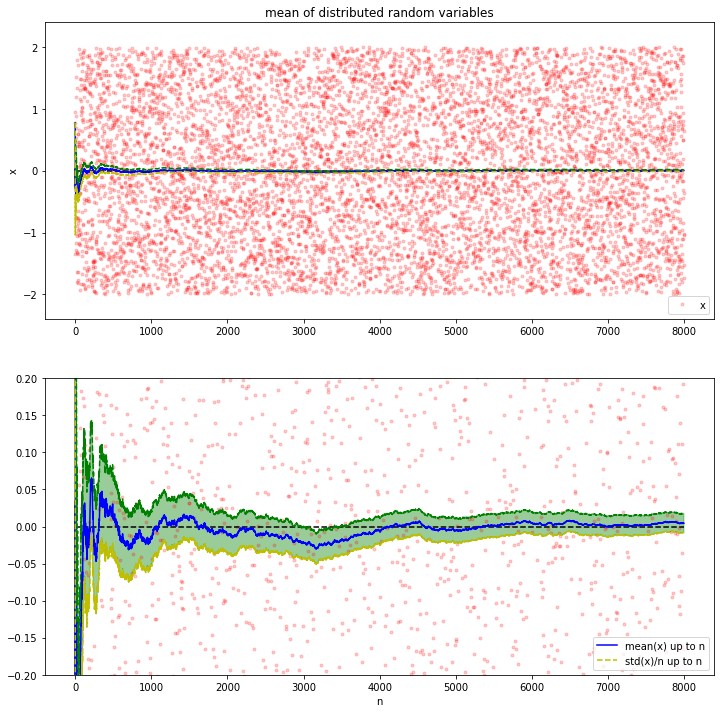

In [16]:
'''progress of mean and variance (std) for growing n; for example: uniform distribution'''
f = plt.figure(figsize=(12,12))
A = 2.4                                       # plot x = {-A..A}
f.add_subplot(211)                            # --- upper graph of 2: full size
plt.ylim(-A, A)
plt.plot(n, x, 'r.', alpha=.2, label='x')     # values of drawn samples
plt.plot([0,N], 2*[distrib.mean()], 'k--')    # dashed line for expectation value
plt.plot(n, m, 'b-')                          # the means up to i
plt.plot(n, m+np.sqrt(v/(n+1)), 'g--')        # +/- the standard deviations up to i
plt.plot(n, m-np.sqrt(v/(n+1)), 'y--')
plt.ylabel('x')
plt.title('mean of distributed random variables')
plt.legend(loc='lower right');

f.add_subplot(212)                            # --- lower graph of 2: detail 
A = 0.2                                       # plot x = {-A..A}
plt.ylim(-A, A)
plt.plot(n, x, 'r.', alpha=.2)                # values of drawn samples as scatter at position n
plt.plot([0,N], 2*[distrib.mean()], 'k--')    # dashed line for expectation value
plt.plot(n, m, 'b-', label='mean(x) up to n') # the means up to i
plt.plot(n, m+np.sqrt(v/(n+1)), 'g--')        # +/- the standard deviations up to i
plt.plot(n, m-np.sqrt(v/(n+1)), 'y--', label='std(x)/n up to n')
plt.xlabel('n')                               # v-- and the std-dev around the mean 
plt.fill_between(n, m-np.sqrt(v/(n+1)), m+np.sqrt(v/(n+1)), color='g', alpha=0.4)
plt.legend(loc='lower right');

![GesetzDerGro3enZahlen_Ausschnitt.png](img/GesetzDerGro3enZahlen_Ausschnitt.png)

# Gesetz der großen Zahlen

Das arithmetische Mittel $\overline{X_n} = \frac{1}{n}\sum_{i=1}^n X_i$  konvergiert *nach Wahrscheinlichkeit* gegen den Erwartungswert $\mathcal{E}\bigl(\overline{X_n}\bigr) = \mathcal{E}\bigl(X\bigr)=\mu$:

Für eine beliebig kleine Konstante $c>0$ gilt
$$P(|\overline{X}_n-\mu|\leq c) \;\xrightarrow{n\rightarrow\infty}\; 1$$

# Zusammenfassung
Durch Zusammensetzen mehrerer *multivariater* Zufallsvariabler entsteht eine neue Zufallsvariable.

- z.B. Summe: $Y = X_1+X_2$

### *Unabhängiges* Zusammensetzen *derselben* Zufallsvariablen
- Konzept der **identisch unabhängig verteilten Zufallsvariablen** (*i.i.d.*)
- z.B. Summe mehrerer *i.i.d.* Zufallsvariable
$$S_n = \sum_{i=1}^n X_i$$
$$\mathcal{E}\bigl(\sum_{i=1}^n X_i\bigr) = n\cdot \mu \qquad\qquad \mathrm{Var}\bigl(\sum_{i=1}^n X_i\bigr)  = n \cdot \sigma^2$$

### $\Leftrightarrow$ Funktionaler Zusammenhang bei *identischen* Zufallsvariablen
- z.B. Quadrat: $Z = X^2$
- *abhängig*

# ...
- Mittelwert mehrerer i.i.d. Zufallsvariable
$$\overline{X_n} = \frac{1}{n}\sum_{i=1}^n X_i$$
$$\mathcal{E}\bigl(\overline{X_n}\bigr) = \mu$$
$$\mathrm{Var}\bigl(\overline{X_n}\bigr) = \frac{1}{n}\sigma^2$$
- Gesetz der großen Zahlen

# Fragen?